In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# PART 1 - 2

In [30]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv("../HW4/resource/iris.data", header=None, names=column_names)
X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]
print(X)
print(y)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: obj

# PART 3

In [31]:
stats = iris.groupby(iris.columns[4]).agg(['mean', 'var', 'min', 'max'])

stats_range = stats.loc[:, (slice(None), ['min', 'max'])]
for c in stats_range.index:
    for f in X.columns:
        stats.loc[c, (f, 'range')] = stats.loc[c, (f, 'max')] - stats.loc[c, (f, 'min')]

stats.head()
# stats_range.head()


sepal_length                     sepal_width                 \
                        mean       var  min  max        mean       var  min   
species                                                                       
Iris-setosa            5.006  0.124249  4.3  5.8       3.418  0.145180  2.3   
Iris-versicolor        5.936  0.266433  4.9  7.0       2.770  0.098469  2.0   
Iris-virginica         6.588  0.404343  4.9  7.9       2.974  0.104004  2.2   

                     petal_length                     petal_width            \
                 max         mean       var  min  max        mean       var   
species                                                                       
Iris-setosa      4.4        1.464  0.030106  1.0  1.9       0.244  0.011494   
Iris-versicolor  3.4        4.260  0.220816  3.0  5.1       1.326  0.039106   
Iris-virginica   3.8        5.552  0.304588  4.5  6.9       2.026  0.075433   

                          sepal_length sepal_width petal_length petal_width  
                 min  max        range       range        range       range  
species                                                                      
Iris-setosa      0.1  0.6          1.5         2.1          0.9         0.5  
Iris-versicolor  1.0  1.8          2.1         1.4          2.1         0.8  
Iris-virginica   1.4  2.5          3.0         1.6          2.4         1.1

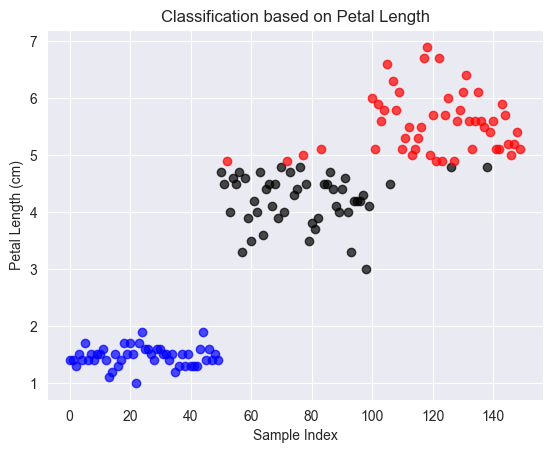

In [32]:
def gaussian_prob(x, mu, var):
    return (1/np.sqrt(2 * np.pi * var)) * np.exp(-0.5 * ((x-mu)**2) / var)

petal_length = iris.iloc[:, 2]
labels = iris[iris.columns[4]].unique()
# means = {cls: iris[iris[iris.columns[4]]==cls].iloc[:,2].mean() for cls in labels}
# variances = {cls: iris[iris[iris.columns[4]]==cls].iloc[:,2].var() for cls in labels}
# print(variances)

preds = []
for v in petal_length:
    probs = {cls: gaussian_prob(v, means[cls], variances[cls]) for cls in labels}
    preds.append(max(probs, key=probs.get))

color_map = {'Iris-setosa': 'blue', 'Iris-versicolor': 'black', 'Iris-virginica': 'red'}


for i, (v, pred) in enumerate(zip(petal_length, preds)):
    plt.scatter(i, v, color=color_map[pred], alpha=0.7)

plt.xlabel('Sample Index')
plt.ylabel('Petal Length (cm)')
plt.title('Classification based on Petal Length')
plt.show()


# PART 5

In [33]:
y_true = iris.iloc[:, 4]
precision = (np.array(preds) == np.array(y_true)).mean() * 100
print("Precision (train, petal length only):", precision)


Precision (train, petal length only): 95.33333333333334


In [37]:
test = pd.read_csv("iris_test_samples.csv")
petal_length_test = test.iloc[:, 2]
y_test = test.iloc[:, 4]

label_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
test["species"] = [label_map[label] for label in y_test]

# print(test.head())
preds_test = []
for v in petal_length_test:
    probs = {cls: gaussian_prob(v, means[cls], variances[cls]) for cls in labels}
    preds_test.append(max(probs, key=probs.get))

precision_test = (np.array(preds_test) == np.array(test["species"])).mean() * 100
print("Precision (test, petal length only):", precision_test)

Precision (test, petal length only): 100.0


# PART 6

In [35]:
means_length = {cls: iris[iris[iris.columns[4]]==cls].iloc[:,2].mean() for cls in labels}
vars_length = {cls: iris[iris[iris.columns[4]]==cls].iloc[:,2].var() for cls in labels}
means_width = {cls: iris[iris[iris.columns[4]]==cls].iloc[:,3].mean() for cls in labels}
vars_width = {cls: iris[iris[iris.columns[4]]==cls].iloc[:,3].var() for cls in labels}

def two_feat_prob(x1, x2, mu1, var1, mu2, var2):
    p1 = gaussian_prob(x1, mu1, var1)
    p2 = gaussian_prob(x2, mu2, var2)
    return (p1 + p2) / 2

preds_double = []
for ix, row in test.iterrows():
    probs = {cls: two_feat_prob(row.iloc[2], row.iloc[3], means_length[cls], vars_length[cls], means_width[cls], vars_width[cls]) for cls in labels}
    preds_double.append(max(probs, key=probs.get))

precision_double = (np.array(preds_double) == np.array(test["species"])).mean() * 100
print("Precision (test, petal length + petal width):", precision_double)

Precision (test, petal length + petal width): 100.0


# PART 8

In [38]:
means_all = {cls: [iris[iris[iris.columns[4]]==cls].iloc[:,i].mean() for i in range(4)] for cls in labels}
vars_all = {cls: [iris[iris[iris.columns[4]]==cls].iloc[:,i].var() for i in range(4)] for cls in labels}
print(pd.DataFrame(means_all))
print(pd.DataFrame(vars_all))
final_preds = []
for ix, row in test.iterrows():
    class_probs = {}
    for cls in labels:
        feat_probs = [gaussian_prob(row.iloc[i], means_all[cls][i], vars_all[cls][i]) for i in range(4)]
        top_two = sorted(feat_probs, reverse=True)[:2]
        class_probs[cls] = np.mean(top_two)
    final_preds.append(max(class_probs, key=class_probs.get))
precision_final = (np.array(final_preds) == np.array(test["species"])).mean() * 100
print("Precision (test, best two out of four features):", precision_final)

   Iris-setosa  Iris-versicolor  Iris-virginica
0        5.006            5.936           6.588
1        3.418            2.770           2.974
2        1.464            4.260           5.552
3        0.244            1.326           2.026
   Iris-setosa  Iris-versicolor  Iris-virginica
0     0.124249         0.266433        0.404343
1     0.145180         0.098469        0.104004
2     0.030106         0.220816        0.304588
3     0.011494         0.039106        0.075433
Precision (test, best two out of four features): 100.0
